In [4]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ner = spacy.load("en_core_web_sm")
df = pd.read_csv('liar2/train.csv')

label
1    5284
3    2967
2    2882
4    2743
0    2425
5    2068
Name: count, dtype: int64

In [215]:
""" df_sample = df.head(1000)
df_sample = df_sample[['label', 'statement']]
df_sample['label'] = df_sample['label'].isin([3, 4, 5]).astype(int)
df_sample.head() """

" df_sample = df.head(1000)\ndf_sample = df_sample[['label', 'statement']]\ndf_sample['label'] = df_sample['label'].isin([3, 4, 5]).astype(int)\ndf_sample.head() "

In [229]:
# Preprocess data
df = df[['label', 'statement']]
df['label'] = df['label'].isin([3, 4, 5]).astype(int)
df.head()

,label,statement
0,0,"90 percent of Americans ""support universal bac..."
1,0,Last year was one of the deadliest years ever ...
2,0,"Bernie Sanders's plan is ""to raise your taxes ..."
3,0,Voter ID is supported by an overwhelming major...
4,0,"Says Barack Obama ""robbed Medicare (of) $716 b..."


In [217]:
def extract_entities(text):
    doc = ner(str(text))
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply NER
df["named_entities"] = df["statement"].apply(extract_entities)

#for i in range(len(df['named_entities'])):
#    print(df['named_entities'][i])

for i in range(10):
    print(df['named_entities'][i])

[('90 percent', 'PERCENT'), ('Americans', 'NORP')]
[('Last year', 'DATE'), ('one', 'CARDINAL'), ('years', 'DATE')]
[("Bernie Sanders's", 'PERSON'), ('90 percent', 'PERCENT')]
[('NYers', 'ORG')]
[('Barack Obama', 'PERSON'), ('Medicare', 'ORG'), ('$716 billion', 'MONEY')]
[]
[('Jeff Reardon', 'PERSON')]
[('One', 'CARDINAL'), ('three', 'CARDINAL')]
[]
[('Joe Donnelly', 'PERSON')]


In [218]:
# Split dataset into true and false based on label
df_true = df[df['label'] == 1]
df_false = df[df['label'] == 0]

df_true['named_entities']

0               [(90 percent, PERCENT), (Americans, NORP)]
3                                           [(NYers, ORG)]
7                     [(One, CARDINAL), (three, CARDINAL)]
10                                                      []
12       [(Guantanamo, FAC), (ISIS, ORG), (al-Qaida, ORG)]
                               ...                        
18354    [(Connecticut, GPE), (fifth, ORDINAL), (35, CA...
18359                        [(just 3.6 percent, PERCENT)]
18360                                     [(40, CARDINAL)]
18361    [(Obama, PERSON), (40 percent, PERCENT), (nine...
18365                    [(Georgia, GPE), (180-day, DATE)]
Name: named_entities, Length: 7778, dtype: object

In [219]:
# Make new datasets with the entity and its corresponding label for analysis
temp = [(entity[0], entity[1]) for sublist in df_true['named_entities'] for entity in sublist]
df_true = pd.DataFrame(temp, columns=['entity', 'label'])

temp = [(entity[0], entity[1]) for sublist in df_false['named_entities'] for entity in sublist]
df_false = pd.DataFrame(temp, columns=['entity', 'label'])

In [220]:
print(df_true['entity'].value_counts(normalize=True).mul(100).round(2))
print(df_true['label'].value_counts(normalize=True).mul(100).round(2))

entity
Texas                         1.51
Obama                         1.33
Americans                     1.22
U.S.                          1.15
Wisconsin                     1.06
                              ... 
Pittsburgh                    0.01
$275 million                  0.01
a quarter-century             0.01
approximately $3.6 million    0.01
180-day                       0.01
Name: proportion, Length: 6155, dtype: float64
label
GPE            18.77
PERSON         16.90
DATE           13.40
CARDINAL       13.28
ORG            11.97
NORP            6.97
PERCENT         6.59
MONEY           6.58
ORDINAL         2.03
LOC             0.70
LAW             0.66
EVENT           0.47
TIME            0.37
QUANTITY        0.35
PRODUCT         0.30
FAC             0.29
WORK_OF_ART     0.28
LANGUAGE        0.08
Name: proportion, dtype: float64


C:\Users\lucan\AppData\Local\Temp\ipykernel_127184\3018982044.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), ha='right', fontsize=10)
C:\Users\lucan\AppData\Local\Temp\ipykernel_127184\3018982044.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), ha='right', fontsize=10)


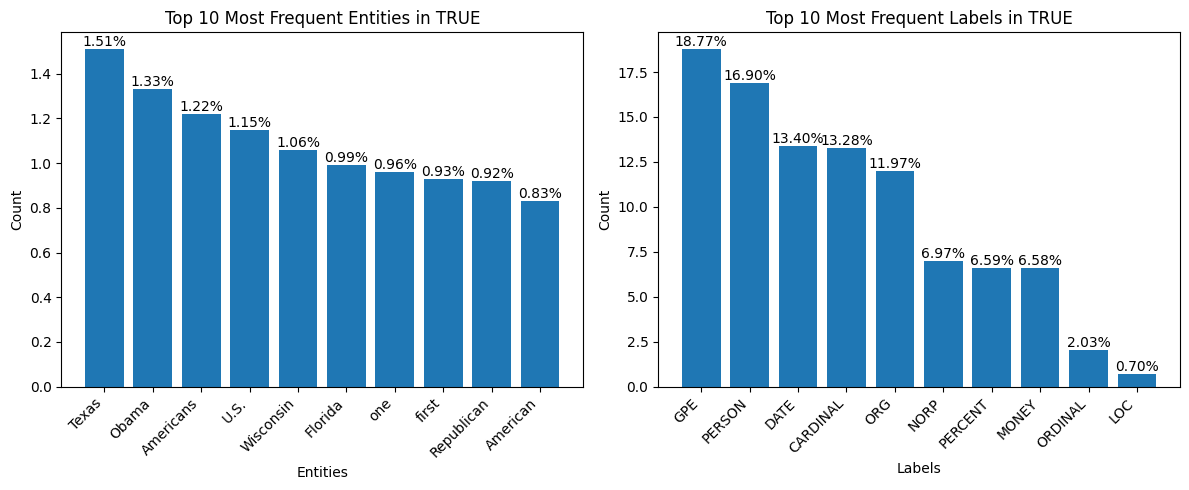

In [221]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# first plot
entity_counts = df_true['entity'].value_counts(normalize=True).mul(100).round(2).head(10)
bars1 = ax[0].bar(entity_counts.index, entity_counts.values)
ax[0].set_xlabel("Entities")
ax[0].set_ylabel("Count")
ax[0].set_title("Top 10 Most Frequent Entities in TRUE")
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xticklabels(ax[0].get_xticklabels(), ha='right', fontsize=10)
ax[0].bar_label(bars1, fmt="%.2f%%")  # add counts on top

# second plot
label_counts = df_true['label'].value_counts(normalize=True).mul(100).round(2).head(10)
bars2 = ax[1].bar(label_counts.index, label_counts.values)
ax[1].set_xlabel("Labels")
ax[1].set_ylabel("Count")
ax[1].set_title("Top 10 Most Frequent Labels in TRUE")
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(), ha='right', fontsize=10)
ax[1].bar_label(bars2, fmt="%.2f%%")  # add counts on top

plt.tight_layout()
plt.show()

In [222]:
print(df_false['entity'].value_counts(normalize=True).mul(100).round(2))
print(df_false['label'].value_counts(normalize=True).mul(100).round(2))

entity
U.S.                   1.64
Obama                  1.46
Donald Trump           1.18
Joe Biden              1.16
Trump                  1.12
                       ... 
2 months               0.00
Amy Coney Barrett's    0.00
five days              0.00
less than 30 days      0.00
18 million             0.00
Name: proportion, Length: 7478, dtype: float64
label
PERSON         26.17
GPE            18.60
ORG            16.84
DATE            9.24
CARDINAL        8.66
NORP            7.05
MONEY           4.53
PERCENT         3.12
ORDINAL         1.23
LOC             0.78
WORK_OF_ART     0.76
FAC             0.62
LAW             0.59
TIME            0.58
EVENT           0.44
PRODUCT         0.42
QUANTITY        0.31
LANGUAGE        0.08
Name: proportion, dtype: float64


C:\Users\lucan\AppData\Local\Temp\ipykernel_127184\449787445.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), ha='right', fontsize=10)
C:\Users\lucan\AppData\Local\Temp\ipykernel_127184\449787445.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), ha='right', fontsize=10)


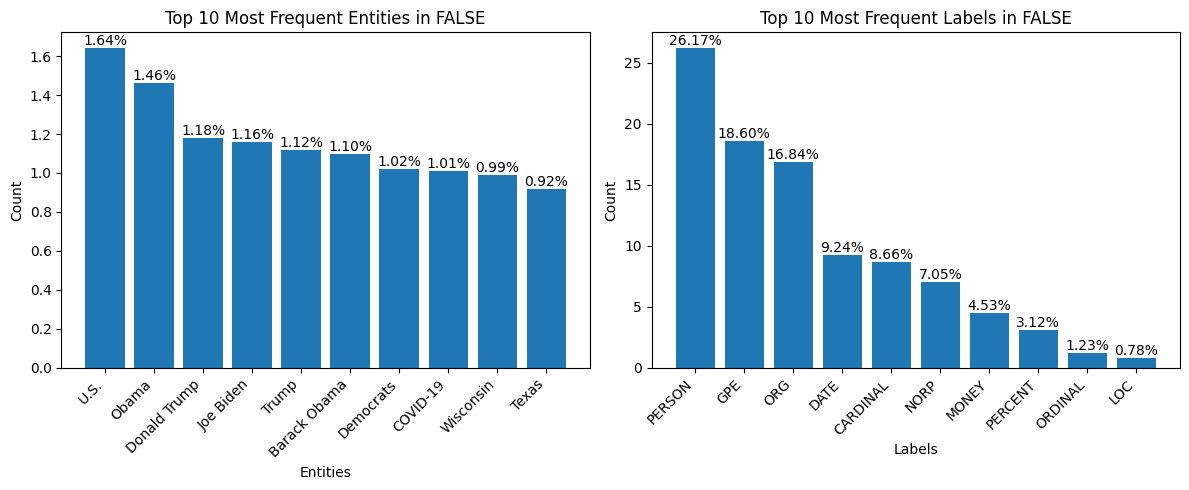

In [223]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# first plot
entity_counts = df_false['entity'].value_counts(normalize=True).mul(100).round(2).head(10)
bars1 = ax[0].bar(entity_counts.index, entity_counts.values)
ax[0].set_xlabel("Entities")
ax[0].set_ylabel("Count")
ax[0].set_title("Top 10 Most Frequent Entities in FALSE")
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xticklabels(ax[0].get_xticklabels(), ha='right', fontsize=10)
ax[0].bar_label(bars1, fmt="%.2f%%")  # add counts on top

# second plot
label_counts = df_false['label'].value_counts(normalize=True).mul(100).round(2).head(10)
bars2 = ax[1].bar(label_counts.index, label_counts.values)
ax[1].set_xlabel("Labels")
ax[1].set_ylabel("Count")
ax[1].set_title("Top 10 Most Frequent Labels in FALSE")
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(), ha='right', fontsize=10)
ax[1].bar_label(bars2, fmt="%.2f%%")  # add counts on top

plt.tight_layout()
plt.show()

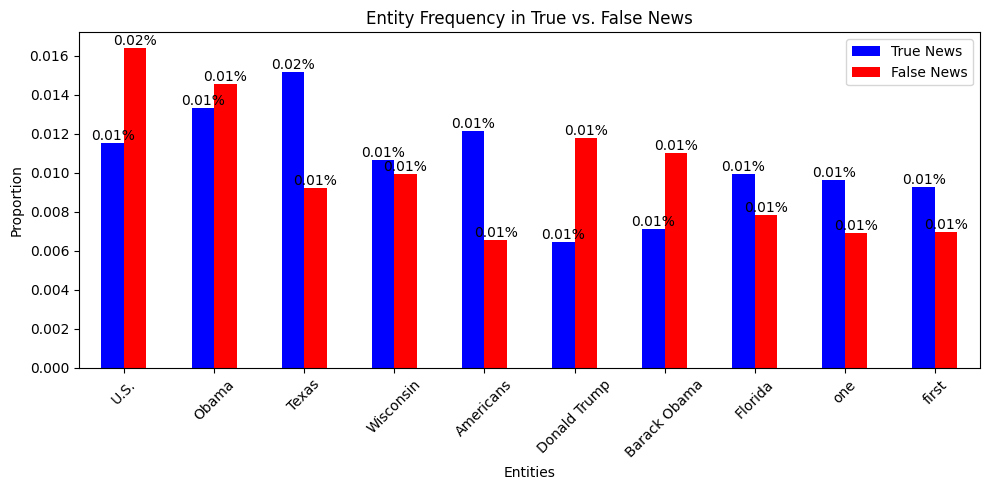

In [230]:
# entity counts (normalized)
combined_entity_counts = ((df_true['entity'].value_counts(normalize=True) + # how many times an entity appears in TRUE news
                           df_false['entity'].value_counts(normalize=True))) # how many times an entity appears in FALSE news
top_10_entities = combined_entity_counts.nlargest(10).index # selects the top 10 most frequently mentioned entities

# only for the top 10 entities we identified earlier
true_entity_counts = df_true['entity'].value_counts(normalize=True).reindex(top_10_entities, fill_value=0)
false_entity_counts = df_false['entity'].value_counts(normalize=True).reindex(top_10_entities, fill_value=0)

entity_df = pd.DataFrame({'True News': true_entity_counts, 'False News': false_entity_counts})

fig, ax = plt.subplots(figsize=(10, 5))
bars = entity_df.plot(kind='bar', ax=ax, color=['blue', 'red'])
ax.set_xlabel("Entities")
ax.set_ylabel("Proportion")
ax.set_title("Entity Frequency in True vs. False News")
ax.legend(["True News", "False News"])
ax.tick_params(axis='x', rotation=45)

# add labels (percentages) on top
ax.bar_label(ax.containers[0], fmt="%.2f%%")
ax.bar_label(ax.containers[1], fmt="%.2f%%")

plt.tight_layout()
plt.show()


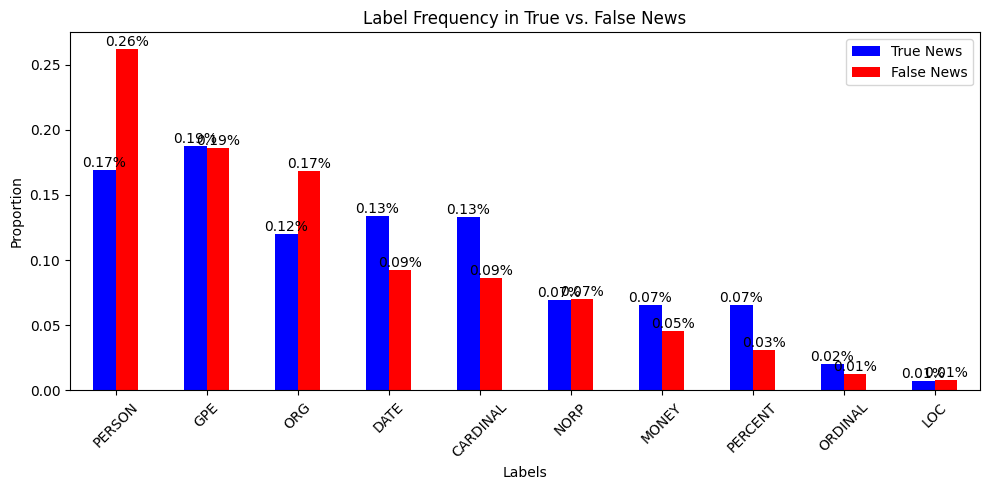

In [ ]:
# label counts (normalized)
combined_label_counts = ((df_true['label'].value_counts(normalize=True) + 
                          df_false['label'].value_counts(normalize=True)))
top_10_labels = combined_label_counts.nlargest(10).index

true_label_counts = df_true['label'].value_counts(normalize=True).reindex(top_10_labels, fill_value=0)
false_label_counts = df_false['label'].value_counts(normalize=True).reindex(top_10_labels, fill_value=0)

label_df = pd.DataFrame({'True News': true_label_counts, 'False News': false_label_counts})

fig, ax = plt.subplots(figsize=(10, 5))
bars = label_df.plot(kind='bar', ax=ax, color=['blue', 'red'])
ax.set_xlabel("Labels")
ax.set_ylabel("Proportion")
ax.set_title("Label Frequency in True vs. False News")
ax.legend(["True News", "False News"])
ax.tick_params(axis='x', rotation=45)

# add labels (percentages) on top
ax.bar_label(ax.containers[0], fmt="%.2f%%")
ax.bar_label(ax.containers[1], fmt="%.2f%%")

plt.tight_layout()
plt.show()